In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    converted_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    converted_image.flags.writeable = False
    results = model.process(converted_image)
    converted_image.flags.writeable = True
    image = cv2.cvtColor(converted_image, cv2.COLOR_RGB2BGR)
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Define drawing specs for different body parts
    face_spec = (mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                 mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    
    pose_spec = (mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                 mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    
    left_hand_spec = (mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                      mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    
    right_hand_spec = (mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                       mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

    # Draw landmarks if available
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, *face_spec)
    
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, *pose_spec)
    
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, *left_hand_spec)
    
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, *right_hand_spec)


In [ ]:
# Initialize webcam capture
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as model:
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        # Run MediaPipe detection
        processed_frame, results = mediapipe_detection(frame, model)
        print(results)
        # Draw landmarks on the frame
        draw_styled_landmarks(processed_frame, results)
        # Display the processed frame
        cv2.imshow('Live Feed', processed_frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh  # ✅ Add this

def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_holistic.POSE_CONNECTIONS
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.left_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS
        )


In [13]:
np.load('0.npy')

array([ 0.52460033,  0.76540983, -1.66842401, ...,  0.        ,
        0.        ,  0.        ])

In [14]:
DATA_PATH = os.path.join('MP_Data') 
actions = np.array(['hellow', 'thankyou', 'iloveyou'])
no_sequences = 30
sequence_length = 30
start_folder = 30

In [15]:
signs = ['hellow', "thankyou", "iloveyou"]
parent_folder = 'MP_Data'

if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)

    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)

        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)


In [16]:
def extract_keypoints(results):
    pose = (
        np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
        if results.pose_landmarks
        else np.zeros(33 * 4)
    )

    face = (
        np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
        if results.face_landmarks
        else np.zeros(468 * 3)
    )

    lh = (
        np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()
        if results.left_hand_landmarks
        else np.zeros(21 * 3)
    )

    rh = (
        np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
        if results.right_hand_landmarks
        else np.zeros(21 * 3)
    )

    return np.concatenate([pose, face, lh, rh])


In [17]:
cap = cv2.VideoCapture(0)

# Set MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Loop through each action
    for action in actions:
        # Loop through each sequence (video)
        for sequence in range(no_sequences):
            # Loop through each frame in the sequence
            for frame_num in range(sequence_length):

                # Read video frame
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks on the image
                draw_styled_landmarks(image, results)

                # Display start message on first frame
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Extract and save keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                # Ensure directory exists
                dir_path = os.path.dirname(npy_path)
                if not os.path.exists(dir_path):
                    os.makedirs(dir_path)

                np.save(npy_path, keypoints)

                # Break gracefully on 'q'
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'hellow': 0, 'thankyou': 1, 'iloveyou': 2}

In [21]:
sequences, labels = [], []

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    sequence_dirs = np.array(os.listdir(action_path)).astype(int)

    for sequence in sequence_dirs:
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy"))
            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])


In [22]:
X = np.array(sequences)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


In [27]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(actions.shape[0], activation='softmax'))


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - categorical_accuracy: 0.2838 - loss: 1.1186
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.2722 - loss: 1.1682
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3014 - loss: 1.2767
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.3562 - loss: 0.9264
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3465 - loss: 1.0258
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3874 - loss: 0.8165
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.5227 - loss: 0.8595
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.8100 - loss: 0.7831
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.8688 - loss: 0.8121
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.7945 - loss: 0.8738
Epoch 11/2000
3/3 ━━━━━━━━━━━

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


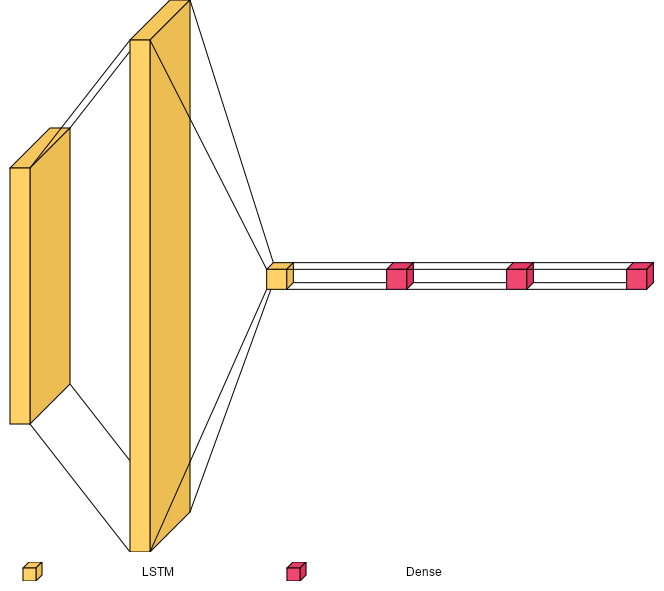

In [31]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font,spacing=100)

In [32]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


In [33]:
actions[np.argmax(res[4])]

'iloveyou'

In [34]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [35]:
model.save('action.h5')

In [36]:
del model

In [37]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [38]:
model.load_weights('action.h5')

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [40]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


In [41]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [42]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [43]:
accuracy_score(ytrue, yhat)

1.0

In [44]:
from scipy import stats

In [45]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        # Draw probability bar
        cv2.rectangle(
            output_frame, 
            (0, 60 + num * 40), 
            (int(prob * 100), 90 + num * 40), 
            colors[num], 
            -1
        )
        
        # Add action label text
        cv2.putText(
            output_frame, 
            actions[num], 
            (0, 85 + num * 40), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            1, 
            (255, 255, 255), 
            2, 
            cv2.LINE_AA
        )
    
    return output_frame


In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# Set MediaPipe model
with mp_holistic.Holistic(
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5
) as holistic:

    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # 3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualization of probabilities
            image = prob_viz(res, actions, image, colors)

        # Display the sentence on the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(
            image, ' '.join(sentence), (3, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
        )

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break loop on 'q' key
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti